## Introduction

*The Diwali Sales Data Analysis project aims to analyze sales data related to the Diwali festival. The dataset, stored in the 'Diwali Sales Data.csv' file, contains information about customers' gender, age group, marital status, occupation, product categories, product IDs, the number of orders, and the corresponding sales amount. The project utilizes Python and various libraries such as NumPy, Pandas, Matplotlib, and Seaborn to perform the analysis.*

### Data Loading and Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

# Removing unnecessary columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Handling missing values
df.dropna(inplace=True)

# Converting 'Amount' column to integer data type
df['Amount'] = df['Amount'].astype('int')

## Exploratory Data Analysis

##### Overview of the Dataset:

In [2]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (11239, 13)


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status   
0  1002903  Sanskriti  P00125942      F     26-35   28               0  \
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  Amount  
0     Maharashtra   Western       Healthcare             Auto       1   23952  
1  Andhra Pradesh  Southern             Govt             Auto       3   23934  
2   Uttar Pradesh   Central       Automobile             Auto       3   23924  
3       Karnataka  Southern     Construction             Auto       2   23912  
4         Gujarat   Western  Food Processing             Auto       2   23877  


In [4]:
# Summary information of the dataset
print("Summary information of the dataset:")
print(df.info())

Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB
None


In [5]:
# Statistical description of numerical columns
print("Statistical description of numerical columns:")
print(df[['Age', 'Orders', 'Amount']].describe())

Statistical description of numerical columns:
                Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610553
std       12.753866      1.114967   5222.355168
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000


### Gender Analysis

<Axes: xlabel='Gender', ylabel='Amount'>

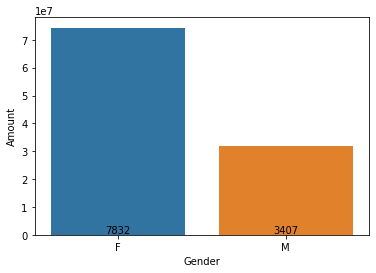

In [6]:
# Count of customers by gender
ax = sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

# Total sales amount by gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age Group Analysis

<Axes: xlabel='Age Group', ylabel='Amount'>

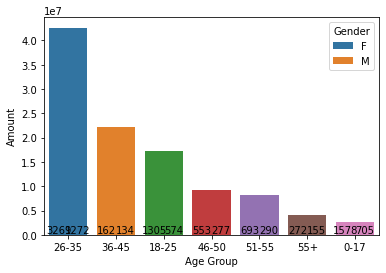

In [7]:
# Count of customers by age group and gender
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

# Total sales amount by age group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State-wise Analysis

<Axes: xlabel='State', ylabel='Amount'>

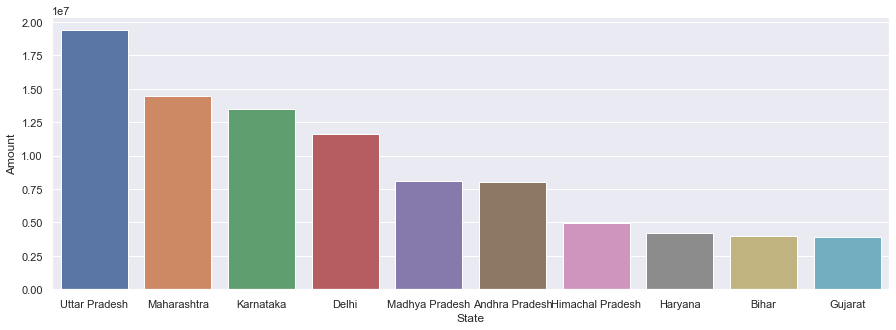

In [8]:
# Top 10 states with the highest number of orders
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Orders')

# Top 10 states with the highest sales amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status Analysis:

<Axes: xlabel='Marital_Status', ylabel='Amount'>

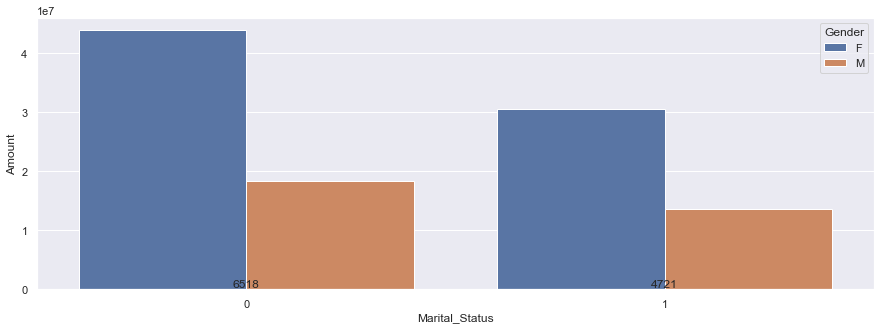

In [9]:
# Count of customers by marital status
ax = sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize': (7, 5)})
for bars in ax.containers:
    ax.bar_label(bars)

# Sales amount by marital status and gender
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize': (6, 5)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation Analysis

<Axes: xlabel='Occupation', ylabel='Amount'>

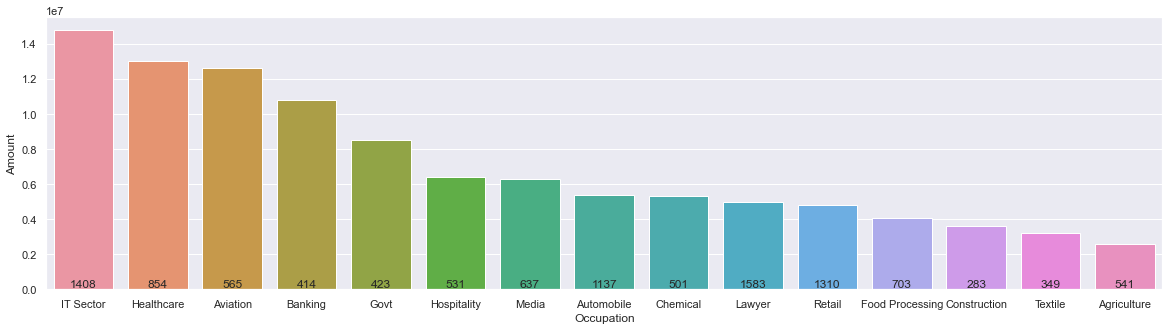

In [10]:
# Count of customers by occupation
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.countplot(data=df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

# Sales amount by occupation
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=sales_state, x='Occupation', y='Amount')


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category Analysis:

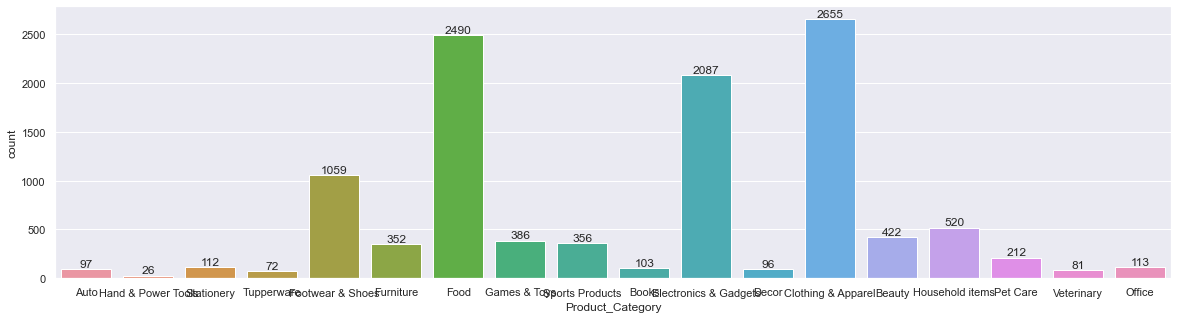

In [11]:
# Count of products by product category
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.countplot(data=df, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

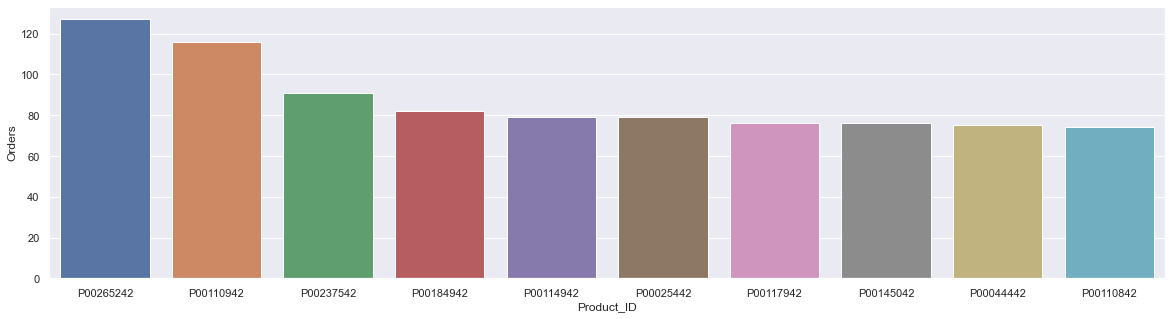

In [12]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

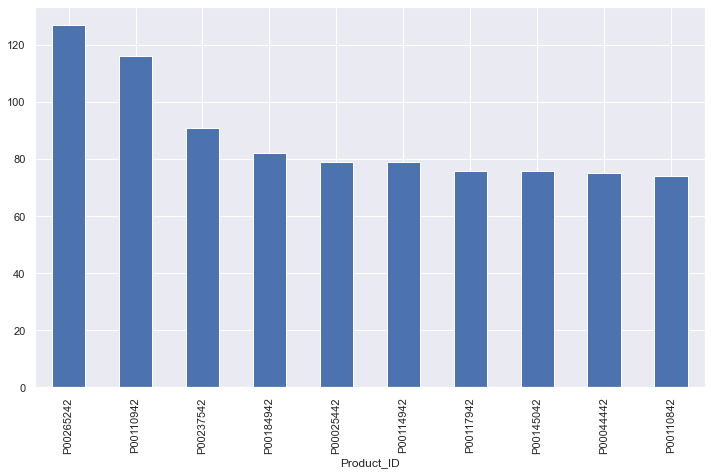

In [13]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:


*The Diwali Sales Data Analysis project provides valuable insights into customer demographics, product preferences, and state-wise performance. The visualizations allow us to understand the key trends and patterns during the Diwali sales season, helping businesses make data-driven decisions to optimize their sales strategies.*

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*